# EV Car Prices

This assignment focuses on car prices. The data ('car_prices.xlsx') is a pre-processed version of original data scraped from bilbasen.dk by previous MAL1 students. The dataset contains 16 columns:

- **Price (DKK)**: The current listed price of the vehicle in Danish Kroner.
- **Model Year**: The manufacturing year of the vehicle.
- **Mileage (km)**: The total kilometres driven by the vehicle (odometer reading).
- **Electric Range (km)**: The estimated maximum driving range on a full charge.
- **Battery Capacity (kWh)**: The total capacity of the vehicle's battery in kilowatt-hours.
- **Energy Consumption (Wh/km)**: The vehicle's energy consumption in watt-hours per kilometre.
- **Annual Road Tax (DKK)**: The annual road tax cost in Danish Kroner.
- **Horsepower (bhp)**: The vehicle's horsepower (brake horsepower).
- **0-100 km/h (s)**: The time (in seconds) for the car to accelerate from 0 to 100 km/h.
- **Top Speed (km/h)**: The maximum speed the vehicle can achieve.
- **Towing Capacity (kg)**: The maximum weight the vehicle can tow.
- **Original Price (DKK)**: The price of the vehicle when first sold as new.
- **Number of Doors**: The total number of doors on the vehicle.
- **Rear-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for rear-wheel drive.
- **All-Wheel Drive (AWD)**: A binary indicator (1 = Yes, 0 = No) for all-wheel drive.
- **Front-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for front-wheel drive.

The first one, **Price**, is the response variable.

The **objective** of this assignment is:
1. Understand how linear algebra is used in Machine Learning, specifically for correlations and regression
2. Learn how to perform multiple linear regression, ridge regression, lasso regression and elastic net
3. Learn how to assess regression models

Please solve the tasks using this notebook as you template, i.e. insert code blocks and markdown block to this notebook and hand it in. Please use 42 as your random seed.


## Import data
 - Import the dataset 
 - Split the data in a training set and test set - make sure you extract the response variable
 - Remember to use the data appropriately; in the tasks below, we do not explicitly state when to use train and test - but in order to compare the models, you must use the same dataset for training and testing in all models.
 - Output: When you are done with this, you should have the following sets: `X` (the original dataset), `X_train`, `X_train`, `X_test`, `y_train`, `y_test`

In [170]:
# Code block for important and creating data sets. Add more code blocks if needed.

# Import required libraries:
# pip install openpyxl
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

from scipy.constants import yocto
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, Ridge, LassoCV, Lasso, ElasticNetCV, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


# Load Data:
data = pd.read_excel('car_prices.xlsx')

# Display some of the data for visual inspection:
print("# Head of the raw Data for visual inspection:")
display(data.head())

# Define the X (features)) and the Y (targets / response variables):
Y = data['Price (DKK)']
X = data.drop(columns=['Price (DKK)'])

# We also drop the "All-Wheel Drive (AWD)" category pr. Ole's heads up on itsLearning:
# Ole Ildsgaard Hougaard (26/02-2025):
# Vi er kommet til at lægge en fælde ind i aflevering 2: Når man har en one-hot encoded feature,
# kan man ikke løse lineær regression efter den angivne matrix-metode. For at løse den korrekt
# skal I droppe en af søjlerne "Rear-Wheel Drive", "All-Wheel Drive" eller "Front-Wheel Drive".
X = X.drop(columns=['All-Wheel Drive (AWD)'])

# Now we use StandardScaler to scale the feature set:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define train data and test data. We use 85% for training and 15% for testing:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

print("\n\n# Head of the training Feature Set for visual inspection:")
print(X_train)

# Head of the raw Data for visual inspection:


,Price (DKK),Model Year,Mileage (km),Electric Range (km),Battery Capacity (kWh),Energy Consumption (Wh/km),Annual Road Tax (DKK),Horsepower (bhp),0-100 km/h (s),Top Speed (km/h),Towing Capacity (kg),Original Price (DKK),Number of Doors,Rear-Wheel Drive,All-Wheel Drive (AWD),Front-Wheel Drive
0,199900,2024,3000,270,39.0,168,780,147,7.9,144,1000,250720,5,0,0,1
1,455555,2024,1001,536,82.0,177,780,408,4.9,180,1800,462900,5,0,1,0
2,309900,2024,4000,460,64.8,162,780,204,7.8,167,750,345620,5,0,0,1
3,425362,2024,10,550,76.6,153,780,286,6.7,180,1000,395615,5,1,0,0
4,749900,2024,0,505,99.8,228,780,384,5.3,200,2500,745520,5,0,1,0




# Head of the training Feature Set for visual inspection:
[[ 0.60049002 -0.68406075  1.00310607 ...  0.3499183   1.27641019
  -0.77891571]
 [ 0.60049002 -0.42294787  1.67419082 ...  0.3499183   1.27641019
  -0.77891571]
 [-0.82538751  0.50098998 -1.68123293 ...  0.3499183  -0.78344721
   1.28383597]
 ...
 [ 0.60049002 -0.38277666 -0.14587237 ...  0.3499183   1.27641019
  -0.77891571]
 [ 0.60049002 -0.44303348  0.97260222 ...  0.3499183   1.27641019
  -0.77891571]
 [ 0.60049002 -0.78448877  1.50133566 ... -1.41127115 -0.78344721
  -0.77891571]]


## Part 1: Linear Algebra
In this assignment, you have to solve all problems using linear algebra concepts. You are free to use SymPy or NumPy - though NumPy is **significantly** more efficient computationally than SymPy since NumPy is optimized for numerical computations with floating-point arithmetic. Since linear regression is purely numerical, NumPy is the better choice.


### Task 1: Regression



Linear regression finds the best-fitting line (or hyperplane) by solving for the **coefficient vector** $\mathbf{B}$ that minimizes the squared error:

$$
\mathbf{B} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

where:
- $\mathbf{X}$ is the **design matrix**, including a column of ones for the intercept.
- $\mathbf{y}$ is the **response variable** (target values).
- $\mathbf{B}$ contains the **regression coefficients**.

**Explanation of Each Step**
1. **Construct the matrix $X$**:
   - Each **row** represents a data point.
   - Each **column** represents a feature.
   - The **first column is all ones** to account for the **intercept**.

2. **Solve for $\mathbf{B}$ using the normal equation**:
   - Compute $X^T X$ (feature correlation).
   - Compute $X^T y$ (cross-product with the target variable).
   - Compute the **inverse of $X^T X$** and multiply by $X^T y$ to get $\mathbf{B}$.

3. **Interpret the results**:
   - The **first value** in $\mathbf{B}$ is the **intercept**.
   - The remaining values are the **coefficients for each feature**.



In [171]:
# Use this for Task 1. Add more code blocks if needed.

# Step 1: Constructing the matrix.
## We iterate through all feature columns, ensuring to add a 1 to the first columns as the intercept.
df = pd.DataFrame(X_train)

## Define the variable that will hold the built matrix. Note a matrix in python is expresses as arrays within arrays [[row1],[row2] [etc.]], where each array within the array is a row.
X_matrix = []

## iterate over all rows in the training data set.
for row in df.itertuples(index=False):
    ### For each row, build an array containing the intercept [1] and all the other column values.
    row_to_add = [1]
    for item in row:
        row_to_add.append(item)

    ### Add the array to the main matrix.
    X_matrix.append(row_to_add)

## Convert it to a numpy array, to gain access to transpose method and other numpy array operations.
X_matrix = np.array(X_matrix)

print("\n\n# This is the first row of the built Matrix:\n", X_matrix[0])

# Step 2: Solving for B (Theta), using the normal equation:
## In order to compute the feature correlation matrix (XTX) we must first compute the transpose of X (Swapping rows and columns):

### Define the transposed matrix:
X_matrix_transpose = X_matrix.transpose()
print("\nThis is the first row of the transposed Matrix:\n", X_matrix_transpose[0])

### To find XTX we multiply the transposed Matrix with the non-transposed Matrix:
XTX_matrix = np.matmul(X_matrix_transpose, X_matrix)
print("\nThis is the first row of the XTX Matrix:\n", XTX_matrix[0])

### Now we find the inverse of the XTX matrix:
XTX_neg1_matrix = np.linalg.inv(XTX_matrix)
print("\nThis is the first row of the inverse XTX Matrix. It helps undo the effects of feature correlation:\n", XTX_neg1_matrix[0])

### Now we find the pseudo inverse of the transposed matrix:
XT_pseudoInverse = np.matmul(XTX_neg1_matrix, X_matrix_transpose)
print("\nThis is the first row of the pseudo inverse matrix:\n", XT_pseudoInverse[0])

### Finally we can now compute the B value (which is also referred to as Theta or Alpha in other documentation):
Beta = np.matmul(XT_pseudoInverse, y_train.to_numpy())
print("\nThe computed Beta value is:\n", Beta)



# This is the first row of the built Matrix:
 [ 1.          0.60049002 -0.68406075  1.00310607  0.54062892 -0.27224447
 -0.14749772 -0.39950689  0.56553162 -0.45900041 -0.38694137  0.01456502
  0.3499183   1.27641019 -0.77891571]

This is the first row of the transposed Matrix:
 [1. 1. 1. ... 1. 1. 1.]

This is the first row of the XTX Matrix:
 [ 5.29200000e+03  1.73356569e+01 -4.77741297e+00 -3.55122327e+01
 -2.85967357e+01 -1.03295014e+01 -5.10030721e+01 -4.03913933e+01
  1.19896531e+01 -4.36338165e+01  3.31897849e+01 -3.47622420e+01
 -2.74214878e+01 -4.07068318e+01  6.94894854e+01]

This is the first row of the inverse XTX Matrix. It helps undo the effects of feature correlation:
 [ 1.89069479e-04 -1.25253989e-06 -1.46040114e-06  6.11644209e-07
 -3.94187333e-07 -7.22358763e-07  2.60446768e-06  3.80416673e-06
  4.04901469e-06  9.09903622e-07 -2.19369405e-06 -2.72918881e-07
  8.34642661e-07 -8.80341816e-07 -3.02117154e-06]

This is the first row of the pseudo inverse matrix:
 [0.000

In [172]:
print("\nThe computed intercept and coefficients are: ",
      "\nintercept:", Beta[0],
      "\nModel Year:", Beta[1],
      "\nMileage (km): ", Beta[2],
      "\nElectric Range (km): ", Beta[3],
      "\nBattery Capacity (kWh): ", Beta[4],
      "\nEnergy Consumption (Wh/km)", Beta[5],
      "\nAnnual Road Tax (DKK)", Beta[6],
      "\nHorsepower (bhp)", Beta[7],
      "\n0-100 km/h (s)", Beta[8],
      "\nTop Speed (km/h)", Beta[9],
      "\nTowing Capacity (kg)", Beta[10],
      "\nOriginal Price (DKK)", Beta[11],
      "\nNumber of Doors", Beta[12],
      "\nRear-Wheel Drive", Beta[13],
      "\nFront-Wheel Drive", Beta[14],)


The computed intercept and coefficients are:  
intercept: 320597.2175226129 
Model Year: 25098.795646624632 
Mileage (km):  -15692.854986097314 
Electric Range (km):  10828.929389940036 
Battery Capacity (kWh):  864.2455751380312 
Energy Consumption (Wh/km) 2258.098304137664 
Annual Road Tax (DKK) -11305.053743172506 
Horsepower (bhp) 1568.9936456931246 
0-100 km/h (s) 10893.937716450928 
Top Speed (km/h) 3778.4295490524055 
Towing Capacity (kg) 7194.414747196574 
Original Price (DKK) 125938.94141670075 
Number of Doors 1718.3067969440951 
Rear-Wheel Drive 6044.661604575273 
Front-Wheel Drive 762.2616560922888


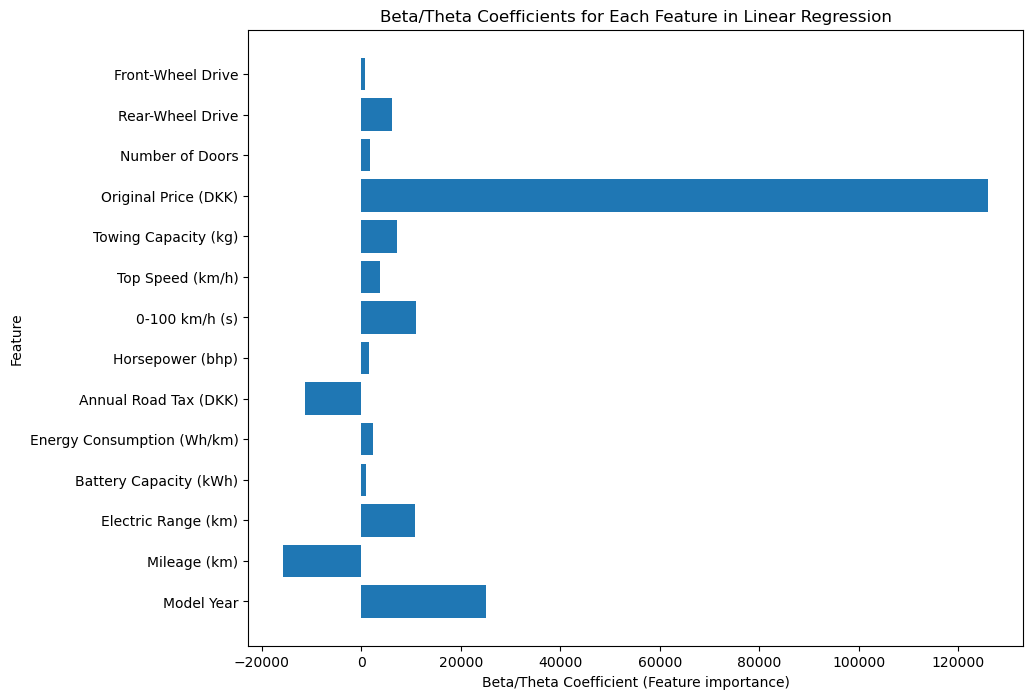

Interpreting results:
Based on the graph, we see that the primary features influencing vehicle price are:
1. Original Price
2. Model Year
3. 0-100 km/h
4. Mileage (km)
5. Electric Range (km)

In conclusion most other features have little to no impact of vehicle price, if using only linear regression to predict price. Also coefficients fluctuate highly in size, meaning the model is not very balanced yet. As such, more work should be done on balancing the coefficients.


In [173]:
##Now let's visualize this data. We ignore the intercept in this visualization.

# When visualizing/interpreting the data, we skip the intercept. This is to better see how important each feature is, after linear regression.
values = Beta[1:]

n_features = len(values)
plt.figure(figsize=(10,8))
plt.barh(range(n_features), values, align='center')

feature_names = ['Model Year', 'Mileage (km)', 'Electric Range (km)', 'Battery Capacity (kWh)', 'Energy Consumption (Wh/km)', 'Annual Road Tax (DKK)', 'Horsepower (bhp)', '0-100 km/h (s)', 'Top Speed (km/h)', 'Towing Capacity (kg)', 'Original Price (DKK)', 'Number of Doors', 'Rear-Wheel Drive', 'Front-Wheel Drive']

plt.yticks(np.arange(n_features), feature_names)
plt.title("Beta/Theta Coefficients for Each Feature in Linear Regression")
plt.xlabel('Beta/Theta Coefficient (Feature importance)')
plt.ylabel('Feature')

# Show the plot
plt.show()

print("Interpreting results:\n"
      "Based on the graph, we see that the primary features influencing vehicle price are:\n1. Original Price\n2. Model Year\n3. 0-100 km/h\n4. Mileage (km)\n5. Electric Range (km)"
      "\n\nIn conclusion most other features have little to no impact of vehicle price, if using only linear regression to predict price. Also coefficients fluctuate highly in size, meaning the model is not very balanced yet. As such, more work should be done on balancing the coefficients.")

### Task 2: Evaluating the Model

Once we have the regression coefficients $\mathbf{B}$, we can evaluate how well the model fits the data using two key metrics:

1. **Mean Squared Error (MSE)** – Measures the average squared difference between the predicted and actual values:
   $$
   MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$
   - Lower MSE means better fit.

2. **$R^2$ (Coefficient of Determination)** – Measures how much of the variance in $y$ is explained by $X$:
   $$
   R^2 = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2}
   $$
   - $R^2$ ranges from **0 to 1**, where **1** indicates a perfect fit and **0** means the model explains no variance.


**Explanation of Each Step**
1. **Compute Predictions**:  
   $$ \hat{y} = X B $$
   This gives the model’s predicted values.

2. **Compute MSE**:  
   - We square the residuals $ (y - \hat{y})^2 $ and take the mean.

3. **Compute $R^2$**:
   - **Total sum of squares** $ SS_{total} $ measures the total variance in $ y $.
   - **Residual sum of squares** $ SS_{residual} $ measures the variance left unexplained by the model.
   - $ R^2 $ tells us what fraction of variance is explained.

**Interpreting the Results**
- **MSE**: Lower values indicate a better fit.
- **$R^2$ Score**:
  - **$R^2 = 1$** → Perfect fit (all points on the regression line).
  - **$R^2 = 0$** → Model is no better than predicting the mean of $ y $.
  - **$R^2 < 0$** → Model performs worse than a simple average.

Implement the above steps using linear algebra so that you both create a regression model and calculate the MSE and $R^2$. Note, here you need to use `X_train`, `X_test`, `y_train` and `y_test` appropriately!


In [174]:
# Step 0: Prepare data. We need to add the intercept column to the test data, for it to be comparable with the beta/theta coefficients
## Define the variable that will hold the built matrix. Note a matrix in python is expresses as arrays within arrays [[row1],[row2] [etc.]], where each array within the array is a row.
X_test_matrix = []

## iterate over all rows in the X test data set.
df = pd.DataFrame(X_test)
for row in df.itertuples(index=False):
    ### For each row, build an array containing the intercept [1] and all the other column values.
    row_to_add = [1]
    for item in row:
        row_to_add.append(item)

    ### Add the array to the main matrix.
    X_test_matrix.append(row_to_add)

## Convert it to a numpy array, to gain access to the transpose function/method and other numpy array operations.
X_test_matrix = np.array(X_test_matrix)

# Step 1: Compute Predictions. We use the test data here, in place of X, so predictions are done on a data set that we have NOT directly trained/extracted our beta/theta coefficients from.
y_predictions = np.matmul(X_test_matrix, Beta)
#print("Predictions are:\n", y_predictions)

# Step 2: Compute MSE
MSE = np.mean((y_test - y_predictions) ** 2)
print("\nMean of Squared Errors (MSE):", MSE)

# Step 3: Compute R^2
R = y_test - y_predictions                      # Compute number of residuals

SST = np.sum((y_test - np.mean(y_test)) ** 2)   # Compute Sum of Squares Total
print("Sum of Squares Total (SST):", SST)

SSR = np.sum(R**2)  # Sum of Squared Residuals
print("Sum of Squared Residuals (SSR):", SSR)

SSE = SST - SSR     # Compute sum of Squared errors
print("Sum of Squared errors (SSE):", SSE)

R_squared = 1 - (SSR / SST)   #Note. The formula used here diverges from the one Ole presented in class. In this I have added a 1 in front of the SSR/SST field, as described here: https://en.wikipedia.org/wiki/Coefficient_of_determination
print("R^2:", R_squared)

print("\nInterpreting results\n1. We see that the MSE seems pretty high, with a mean squared error of 2,9 billion kr...\n2. But we do see that the R^2 score is pretty good, falling only 20% short of perfect (1). This tells that the model is likely decent at predicting the car prices based on the provided features.")

print("\n\nLet's see what the model score is, for this model:")
ols = LinearRegression()
ols.fit(X_train, y_train)
print("Score on train set = {0}, Score on test set = {1}".format(ols.score(X_train, y_train), ols.score(X_test, y_test)))



Mean of Squared Errors (MSE): 2926158719.8053427
Sum of Squares Total (SST): 19523741311388.04
Sum of Squared Residuals (SSR): 2733032244298.19
Sum of Squared errors (SSE): 16790709067089.85
R^2: 0.8600149325527052

Interpreting results
1. We see that the MSE seems pretty high, with a mean squared error of 2,9 billion kr...
2. But we do see that the R^2 score is pretty good, falling only 20% short of perfect (1). This tells that the model is likely decent at predicting the car prices based on the provided features.


Let's see what the model score is, for this model:
Score on train set = 0.9012304077139655, Score on test set = 0.8600149325527056


# Part 2: Using Library Functions

### Task 3: Correlation and OLS
For this task you must do the following
 - Using library functions, build the following models:
   - Correlation matrix where the correlations are printed in the matrix and a heat map is overlaid
   - Ordinary least squares
   - Performance metrics: MSE, RMSE, $R^2$
   - Comment on the real world meaning of RMSE and $R^2$


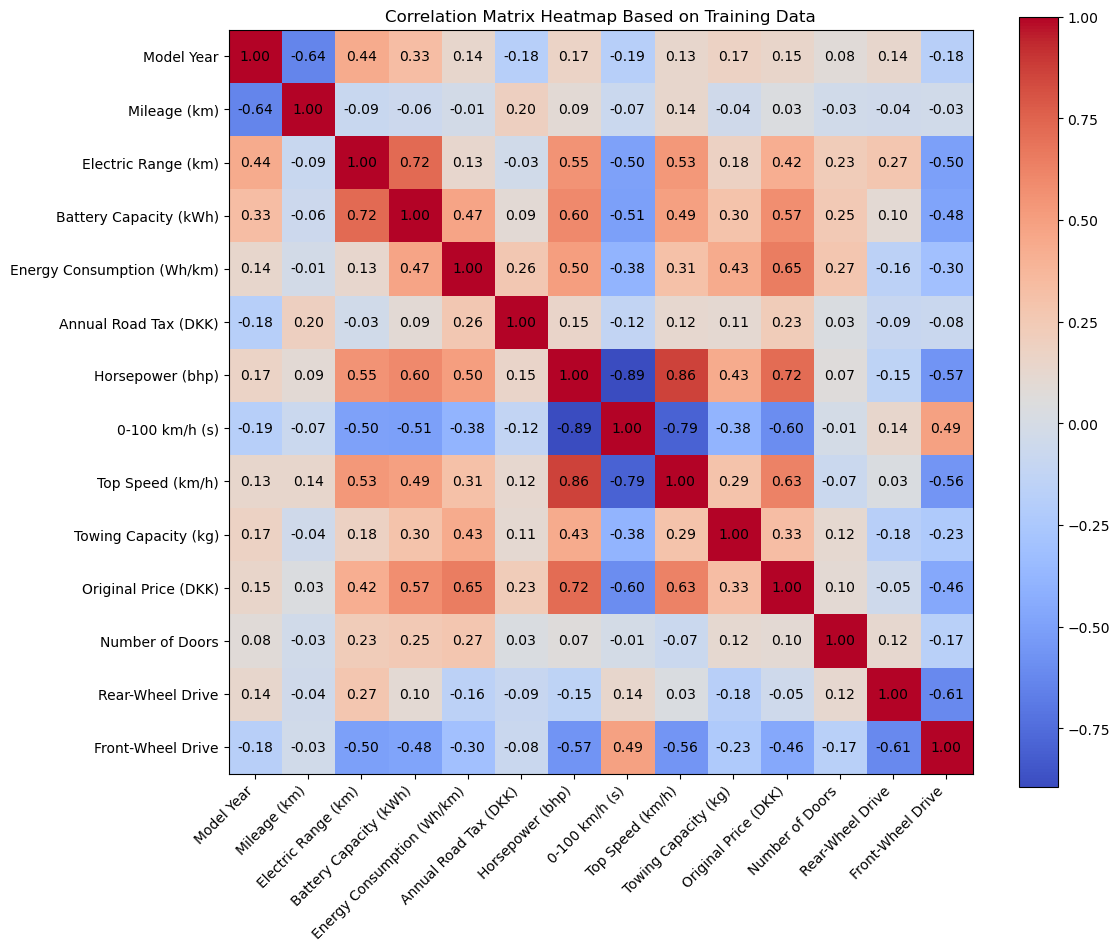

Intercept:  0.0 
Coefficients:  [320597.21752261  25098.79564662 -15692.8549861   10828.92938994
    864.24557514   2258.09830414 -11305.05374317   1568.99364569
  10893.93771645   3778.42954905   7194.4147472  125938.9414167
   1718.30679694   6044.66160458    762.26165609]

Mean of Squared Errors (MSE)  : 2926158719.80534
Root Mean Squared Error (RMSE): 54093.98043965095
R^2 is                        :  0.8600149325527053

Comments on real world meaning of RMSE and R^2:
The RMSE being 54.093 shows that the model will predict the price (target) of a vehicle with a mean deviation of 54.093 DKK. Thus deviations may be larger or smaller, since this is just the mean value - but the price estimation will on average be within 54.093 DKK of the actual value.

The R^2 being 0.86 tells us that 86% of the variation in the vehicle prices is explained by the model's features, while the remaining 14% is unexplained. This may require further refinement of which features to train against - especiall

In [175]:
# Use this for Task 3. Add more code blocks if needed.

# Build the correlation matrix: For this we use the training data to build the correlation matrix
## First we must convert the numpy array (X_train) back into a data frame.
X_train_df = pd.DataFrame(X_train, columns=feature_names)

## Now we can use the pandas corr() method to build the correlation matrix.
corr_matrix = X_train_df.corr()
#display(corr_matrix)

## Now we can use matplotlib to plot the heatmap with the correlation matrix
fig, ax = plt.subplots(figsize= (12, 10))
cax = ax.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(cax)

### Add the column/feature names to the plot legend:
ax.set_xticks(np.arange(len(X_train_df.columns)))
ax.set_xticklabels(X_train_df.columns, rotation=45, ha="right")

ax.set_yticks(np.arange(len(X_train_df.columns)))
ax.set_yticklabels(X_train_df.columns)

### Place the correlation values on the heatmap
for i in range(len(X_train_df.columns)):
    for j in range(len(X_train_df.columns)):
        ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black")

plt.title("Correlation Matrix Heatmap Based on Training Data")
plt.show()


# Compute OLS: We save the Ordinary Least Square coefficients to a Matrix, since we have multiple features
ols = LinearRegression(fit_intercept=False)
poly = PolynomialFeatures(degree=1) # We maintain the linear model
X1 = poly.fit_transform(X_train)
ols.fit(X1, y_train)
intercept, coef = ols.intercept_, ols.coef_
print("Intercept: ", intercept, "\nCoefficients: ", coef)

# Compute performance metrics: We use the test data here, in place of X, so predictions are done on a data set that we have NOT directly trained/extracted our beta/theta coefficients from.
## MSE:
y_predictions = ols.predict(X_test_matrix) # Does the same as the prediction calculation in the earlier task!
#print("Predictions are:\n", y_predictions)

MSE = np.mean((y_test - y_predictions) ** 2)
print("\nMean of Squared Errors (MSE)  :", MSE)

## RMSE:
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error (RMSE):", RMSE)


## R**2: We use the built in ols.score() method, and use our previously prepared test data. X_test_matrix is simply X_test, but scaled and with the intercept column added!
print("R^2 is                        : ", ols.score(X_test_matrix, y_test))


# Comment on the real world meaning of RMSE and R**2
print("\nComments on real world meaning of RMSE and R^2:\n"
      "The RMSE being 54.093 shows that the model will predict the price (target) of a vehicle with a mean deviation of 54.093 DKK. Thus deviations may be larger or smaller, since this is just the mean value - but the price estimation will on average be within 54.093 DKK of the actual value."
      "\n\nThe R^2 being 0.86 tells us that 86% of the variation in the vehicle prices is explained by the model's features, while the remaining 14% is unexplained. This may require further refinement of which features to train against - especially  features such as horsepower and top speed and 0-100 km/h are likely derived from each other, so only one of these should be maintained in the training set.")


### Task 4: Ridge, Lasso and Elastic Net
In order for Ridge and Lasso (and Elastic net) to have an effect, you must use scaled data to build the models, since regularization depends on coefficient magnitude, and if using non-scaled data the penalty will affect them unequally. Feel free to use this code to scale the data:

```python
# Standardize X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()
```
For the final task you must do the following
   - Ridge regression (using multiple alphas)
   - Lasso regression (using multiple alphas)
   - Elastic Net (using multiple alphas)
 - Discussion and conclusion:
   - Discuss the MSE and $R^2$ of all 3 models and conclude which model has the best performance - note the MSE will be scaled!
   - Rebuild the OLS model from Task 4, but this time use the scaled data from this task - interpret the meaning of the model's coefficients
   - Use the coefficients of the best ridge and lasso model to print the 5 most important features and compare to the 5 most important features in the OLS with scaled data model. Do the models agree about which features are the most important?

Note: You may get a convergence warning; try increasing the `max_iter` parameter of the model (the default is 1000 - maybe set it to 100000)

In [176]:
# Ridge Regression: The principle is to penalize large coefficients by a factor of alpha, basically attempting to find the best regularization parameter (alpha) and to adjust unbalanced features. Thus, it is very important that features are already scaled, before attempting to ridge. Scaling was done during data preparation.
## Best when all features are useful, but you want to reduce their impact.
print("Performing Ridge Regression:")
ridge_cv = RidgeCV(alphas = np.linspace(1, 1000, 1000)) # the 1, 1000, 1000 -> defines 1000 evenly spaced values between 1 and 1000 to test different regularization levels and find the most optimal
ridge_cv.fit(X_train, y_train)
print("Ridge: Penalization alpha value", ridge_cv.alpha_)

ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

## Computing MSE for Ridge:
mse_ridge_train = mean_squared_error(y_train, ridge.predict(X_train))
mse_ridge_test = mean_squared_error(y_test, ridge.predict(X_test))
print("Ridge: MSE: ", mse_ridge_train, "(train data), ", mse_ridge_test, "(test data)")
print("Ridge: Score (R^2) on train set = {0}, Score (R^2) on test set = {1}".format(ridge.score(X_train, y_train), ridge.score(X_test, y_test)))



# Lasso Regression: Same principle as Ridge
## Best when you have many features and want to remove irrelevant ones.
print("\n\nPerforming Lasso Regression:")
lasso_cv = LassoCV(alphas = np.linspace(1, 1000, 1000))  # the 1, 1000, 1000 -> defines 1000 evenly spaced values between 1 and 1000 to test different regularization levels and find the most optimal
lasso_cv.fit(X_train, y_train)
print("Lasso: Penalization alpha value", lasso_cv.alpha_)

lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

## Computing MSE for Lasso:
mse_lasso_train = mean_squared_error(y_train, lasso.predict(X_train))
mse_lasso_test = mean_squared_error(y_test, lasso.predict(X_test))
print("Lasso: MSE: ", mse_lasso_train, "(train data), ", mse_lasso_test, "(test data)")
print("Lasso: Score (R^2) on train set = {0}, Score (R^2) on test set = {1}".format(lasso.score(X_train, y_train), lasso.score(X_test, y_test)))



# Elastic Net Regression: Same principle as Lasso
## Best when you have many correlated features.
print("\n\nPerforming ElasticNet Regression:")
elastic_cv = ElasticNetCV(alphas = np.linspace(1, 1000, 1000))  # the 1, 1000, 1000 -> defines 1000 evenly spaced values between 1 and 1000 to test different regularization levels and find the most optimal
elastic_cv.fit(X_train, y_train)
print("ElasticNet: Penalization alpha value", elastic_cv.alpha_)

elasticNet = Lasso(alpha = elastic_cv.alpha_)
elasticNet.fit(X_train, y_train)

## Computing MSE for Lasso:
mse_elasticNet_train = mean_squared_error(y_train, elasticNet.predict(X_train))
mse_elasticNet_test = mean_squared_error(y_test, elasticNet.predict(X_test))
print("ElasticNet: MSE: ", mse_elasticNet_train, "(train data), ", mse_elasticNet_test, "(test data)")
print("ElasticNet: Score (R^2) on train set = {0}, Score (R^2) on test set = {1}".format(elasticNet.score(X_train, y_train), elasticNet.score(X_test, y_test)))

Performing Ridge Regression:
Ridge: Penalization alpha value 39.0
Ridge: MSE:  2173514834.394274 (train data),  2928258815.0373206 (test data)
Ridge: Score (R^2) on train set = 0.9011207033046805, Score (R^2) on test set = 0.859914465694669


Performing Lasso Regression:
Lasso: Penalization alpha value 324.0
Lasso: MSE:  2173203409.772186 (train data),  2895296241.07855 (test data)
Lasso: Score (R^2) on train set = 0.9011348708857425, Score (R^2) on test set = 0.8614913685836421


Performing ElasticNet Regression:
ElasticNet: Penalization alpha value 1.0
ElasticNet: MSE:  2171103427.0237646 (train data),  2926051270.597401 (test data)
ElasticNet: Score (R^2) on train set = 0.9012304050012454, Score (R^2) on test set = 0.8600200728359438


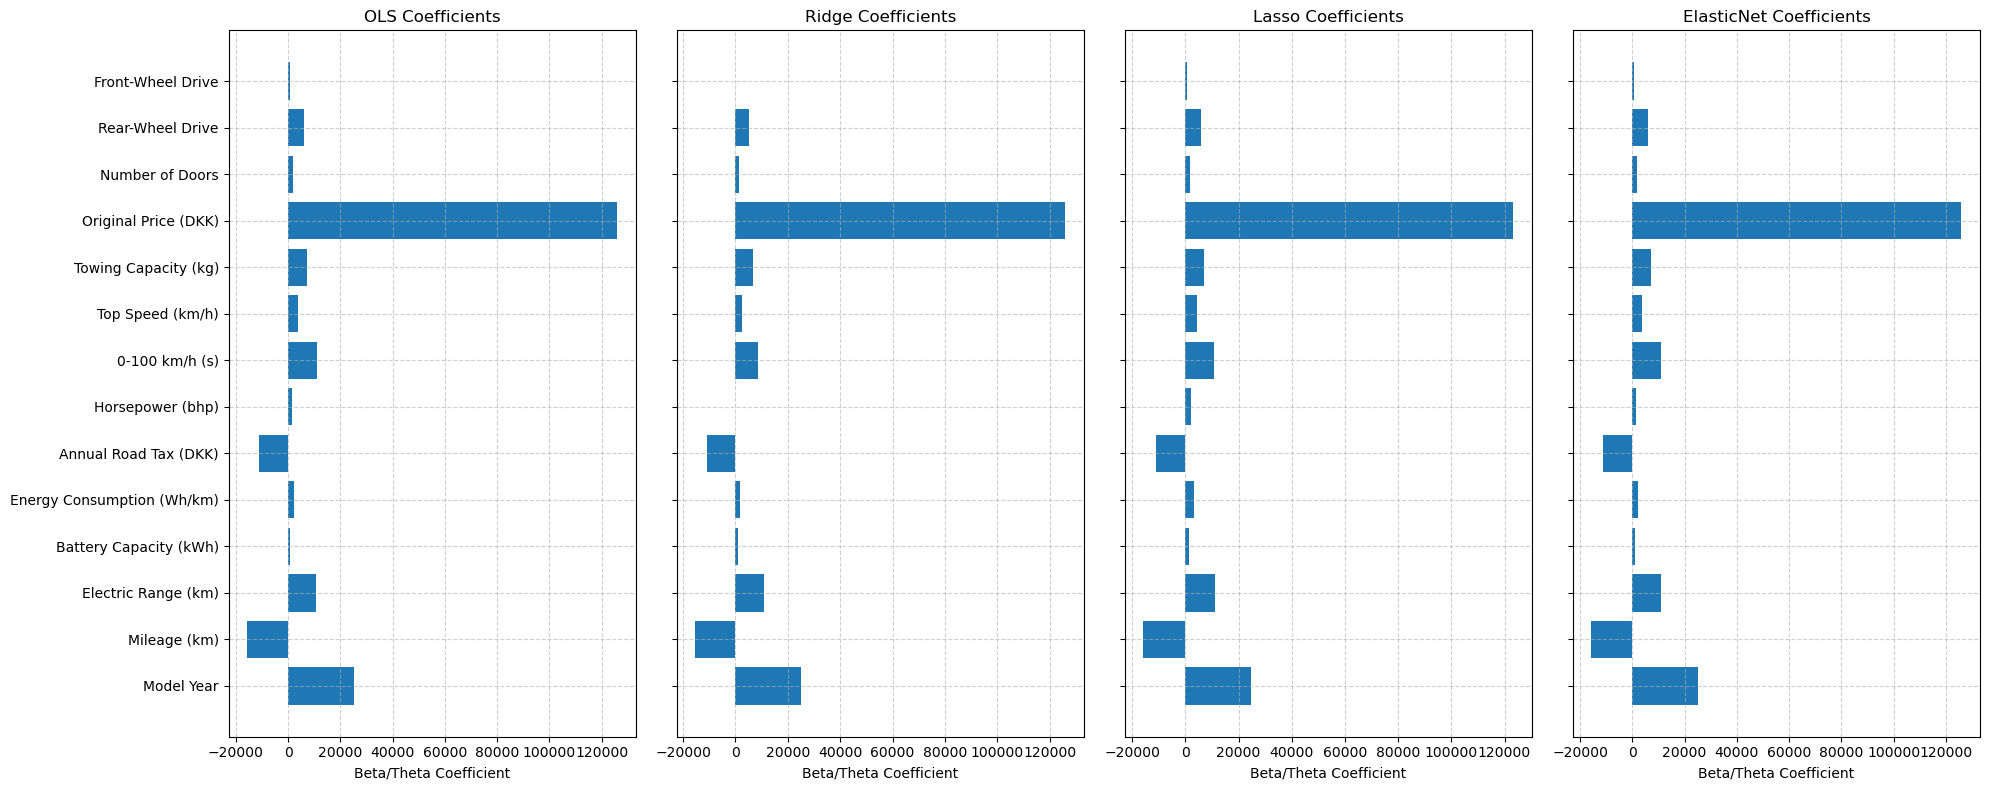

Below we compare the MSE for each of the models:
ols MSE       :  2171103367.3941193 (Training Data).  2926158719.80534 (Test Data)
ridge MSE     :  2173514834.394274 (Training Data).  2928258815.0373206 (Test Data)
lasso MSE     :  2173203409.772186 (Training Data).  2895296241.07855 (Test Data)
elasticNet MSE:  2171103427.0237646 (Training Data).  2926051270.597401 (Test Data)

Below we compare the R^2 for each of the models:
ols R^2 (score)       :  0.9012304077139655 (Training Data).  0.8600149325527053 (Test Data)
ridge R^2 (score)     :  0.9011207033046805 (Training Data).  0.859914465694669 (Test Data)
lasso R^2 (score)     :  0.9011348708857425 (Training Data).  0.8614913685836421 (Test Data)
elasticNet R^2 (score):  0.9012304050012454 (Training Data).  0.8600200728359438 (Test Data)


In [177]:
# Discussions and Conclusions

# Sample Beta values for demonstration (excluding intercept)
beta_values_ols = ols.coef_[1:] # We ignore the first column, since the way ols was implemented earlier (using polynomial features with degree = 1, automatically adds an intercept column).
beta_values_ridge = lasso.coef_
beta_values_lasso = ridge.coef_
beta_values_elasticNet = elasticNet.coef_

# Create subplots with 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20, 8), sharey=True)  # Share Y-axis for better comparison

## We use this function to plot each graph, so they are comparable in layout/size/color/etc.
def plot_beta(ax, values, title):
    ax.barh(range(len(values)), values, align='center')
    ax.set_yticks(np.arange(len(values)))
    ax.set_yticklabels(feature_names)
    ax.set_title(title)
    ax.set_xlabel("Beta/Theta Coefficient")
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# Plot the coefficients for each of the 4 models and compare to the fatures:
plot_beta(axes[0], beta_values_ols, "OLS Coefficients")
plot_beta(axes[1], beta_values_ridge, "Ridge Coefficients")
plot_beta(axes[2], beta_values_lasso, "Lasso Coefficients")
plot_beta(axes[3], beta_values_elasticNet, "ElasticNet Coefficients")

plt.tight_layout()
plt.show()

# Comparing MSE and R^2 for each:
print("Below we compare the MSE for each of the models:")
print("ols MSE       : ", mean_squared_error(y_train, ols.predict(poly.transform(X_train))), "(Training Data). ", mean_squared_error(y_test, ols.predict(poly.transform(X_test))), "(Test Data)") # Need to transform this, since ols was trained with the polynomial method, thus added an intercept to the coef_ array
print("ridge MSE     : ", mean_squared_error(y_train, ridge.predict(X_train)), "(Training Data). ", mean_squared_error(y_test, ridge.predict(X_test)), "(Test Data)")
print("lasso MSE     : ", mean_squared_error(y_train, lasso.predict(X_train)), "(Training Data). ", mean_squared_error(y_test, lasso.predict(X_test)), "(Test Data)")
print("elasticNet MSE: ", mean_squared_error(y_train, elasticNet.predict(X_train)), "(Training Data). ", mean_squared_error(y_test, elasticNet.predict(X_test)), "(Test Data)")

print("\nBelow we compare the R^2 for each of the models:")
print("ols R^2 (score)       : ", ols.score(poly.transform(X_train), y_train), "(Training Data). ", ols.score(poly.transform(X_test), y_test) , "(Test Data)") # Need to transform this, since ols was trained with the polynomial method, thus added an intercept to the coef_ array
print("ridge R^2 (score)     : ", ridge.score(X_train, y_train),"(Training Data). ", ridge.score(X_test, y_test) , "(Test Data)")
print("lasso R^2 (score)     : ", lasso.score(X_train, y_train),"(Training Data). ", lasso.score(X_test, y_test) , "(Test Data)")
print("elasticNet R^2 (score): ", elasticNet.score(X_train, y_train),"(Training Data). ", elasticNet.score(X_test, y_test) , "(Test Data)")



### Discussion What can we learn from the MSE and the R^2?
Answer: All 4 models provide similar results. They align closely, indicating that the specific choice of regression method is less important - and scaling the data, cleaning the data, etc. much more important).

Studying the Mean Squared Errors (MSE) we see that all models are virtually indistinguishable, both on training data and test data. Although a markedly higher number of errors are computed based on the test data compared to the training data. This is to be expected, since the models have each configured themselves to align as well as possible with the training data.

Studying the R^2 (Score), we see that all models provide an explanation of about 90% of all the variance in the results. This falls to about 86% when running through the test data. These scores are highly satisfactory - where a higher score could indicate significant overfitting - and a lower score could indicate underfitting. These results in the mid 85 percentile could hardly be expected to be better.

The best performing model is the Lasso Model (but only very slightly), which makes the lasso model an obvious choice to continue working with.

In [178]:
# 5 Most important features for each model, in ascending order (most important first):
print("\nTop 5 Most Important Features for each model:")
ols_coef = pd.Series(ols.coef_[1:], index=feature_names)
ols_important_features = ols_coef.sort_values(ascending=False)
print("Ordinary Least Squares (Linear): "
      "\n1. ", ols_important_features.index[0],", weight = ", ols_important_features.iloc[0],
      "\n2. ", ols_important_features.index[1],", weight = ", ols_important_features.iloc[1],
      "\n3. ", ols_important_features.index[2],", weight = ", ols_important_features.iloc[2],
      "\n4. ", ols_important_features.index[3],", weight = ", ols_important_features.iloc[3],
      "\n5. ", ols_important_features.index[4],", weight = ", ols_important_features.iloc[4])


ridge_coef = pd.Series(ridge.coef_, index=feature_names)
ridge_important_features = ridge_coef.sort_values(ascending=False)
print("\nLasso Regression (Linear): "
      "\n1. ", ridge_important_features.index[0],", weight = ", ridge_important_features.iloc[0],
      "\n2. ", ridge_important_features.index[1],", weight = ", ridge_important_features.iloc[1],
      "\n3. ", ridge_important_features.index[2],", weight = ", ridge_important_features.iloc[2],
      "\n4. ", ridge_important_features.index[3],", weight = ", ridge_important_features.iloc[3],
      "\n5. ", ridge_important_features.index[4],", weight = ", ridge_important_features.iloc[4])


lasso_coef = pd.Series(lasso.coef_, index=feature_names)
lasso_important_features = lasso_coef.sort_values(ascending=False)
print("\nLasso Regression (Linear): "
      "\n1. ", lasso_important_features.index[0],", weight = ", lasso_important_features.iloc[0],
      "\n2. ", lasso_important_features.index[1],", weight = ", lasso_important_features.iloc[1],
      "\n3. ", lasso_important_features.index[2],", weight = ", lasso_important_features.iloc[2],
      "\n4. ", lasso_important_features.index[3],", weight = ", lasso_important_features.iloc[3],
      "\n5. ", lasso_important_features.index[4],", weight = ", lasso_important_features.iloc[4])


elasticNet_coef = pd.Series(elasticNet.coef_, index=feature_names)
elasticNet_important_features = elasticNet_coef.sort_values(ascending=False)
print("\nElastic Net Regression (Linear): "
      "\n1. ", elasticNet_important_features.index[0],", weight = ", elasticNet_important_features.iloc[0],
      "\n2. ", elasticNet_important_features.index[1],", weight = ", elasticNet_important_features.iloc[1],
      "\n3. ", elasticNet_important_features.index[2],", weight = ", elasticNet_important_features.iloc[2],
      "\n4. ", elasticNet_important_features.index[3],", weight = ", elasticNet_important_features.iloc[3],
      "\n5. ", elasticNet_important_features.index[4],", weight = ", elasticNet_important_features.iloc[4])


Top 5 Most Important Features for each model:
Ordinary Least Squares (Linear): 
1.  Original Price (DKK) , weight =  125938.94141670075 
2.  Model Year , weight =  25098.795646624618 
3.  0-100 km/h (s) , weight =  10893.93771645095 
4.  Electric Range (km) , weight =  10828.929389939989 
5.  Towing Capacity (kg) , weight =  7194.414747196544

Lasso Regression (Linear): 
1.  Original Price (DKK) , weight =  123331.49983073838 
2.  Model Year , weight =  24728.4396610164 
3.  Electric Range (km) , weight =  10990.807336134021 
4.  0-100 km/h (s) , weight =  10633.802094415078 
5.  Towing Capacity (kg) , weight =  6993.003704847111

Lasso Regression (Linear): 
1.  Original Price (DKK) , weight =  125893.44511856993 
2.  Model Year , weight =  25147.65311166873 
3.  Electric Range (km) , weight =  10745.767485864715 
4.  0-100 km/h (s) , weight =  8435.574098794794 
5.  Towing Capacity (kg) , weight =  6792.775815714686

Elastic Net Regression (Linear): 
1.  Original Price (DKK) , weight

### Discussion: How do the 5 most important features for each model correlate with each other?
Answer: All 4 models share the same 5 most important features. Amongst these 5, all models view the Original Price and the Model year as the 2 most important features.

After that, the models disagree of whether the acceleration (0-100 km/h) or the Electric ranges are the next most important features, as these are either in 3rd of 4th place for each model.

All models agree that the towing capacity is the 5th most important feature.

Looking at the results, it is to be expected that the original price and the model year are two of the most important features, as anyone who studies car prices - or have bought a car - will likely agree with.
Unexpectedly mileage is not among the top 5, nor horsepower - prioritizing instead acceleration speed. Perhaps this is linked to the introduction of electric vehicles (which have very high acceleration speeds)?

It should be considered if electric vehicles and classic vehicles should be evaluated in each their own data sets, to ensure that we compare vehicles that are as closely related as possible. For improved reliability in predictions consider training:
 1. a diesel_car model,
 2. a benzine_car model
 3. a electric_car model
 4. (models for trucks, motorcycles, etc.)

This might improve prediction reliability - but should of course be verified first.